Install all necessary modules for analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# minor pandas configuration
pd.options.display.max_rows = None
pd.options.display.max_columns = None

reading the data and display some few rows

In [3]:
df = pd.read_csv("./data/cab_rides.csv")

# i already know the dataset contains some data i dont new i will just go ahead and remove it
# if this is the first time am seeing this data i might have go deep into the data before i realise and remove it
df = df.loc[df['cab_type'] == 'Uber']
df.head()


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
12,1.11,Uber,1543615981179,West End,North End,12.0,1.0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
13,1.11,Uber,1544698211014,West End,North End,16.0,1.0,23f145da-f0c1-4d1f-a184-496bc003a7db,6c84fd89-3f11-4782-9b50-97c468b19529,Black
14,1.11,Uber,1544728503935,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
15,1.11,Uber,1545004511430,West End,North End,7.5,1.0,50ef1165-9d23-416c-a65c-18906207b295,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
16,1.11,Uber,1544748007961,West End,North End,26.0,1.0,91c4861c-1780-42b0-bca1-bbd64a422cc3,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385663 entries, 12 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          385663 non-null  float64
 1   cab_type          385663 non-null  object 
 2   time_stamp        385663 non-null  int64  
 3   destination       385663 non-null  object 
 4   source            385663 non-null  object 
 5   price             330568 non-null  float64
 6   surge_multiplier  385663 non-null  float64
 7   id                385663 non-null  object 
 8   product_id        385663 non-null  object 
 9   name              385663 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 32.4+ MB


In [5]:
df.describe()
# from the data below our timestamp isnt in the right format for us to make sense out of it

,distance,time_stamp,price,surge_multiplier
count,385663.000000,3.856630e+05,330568.000000,385663.0
mean,2.191386,1.544046e+12,15.795343,1.0
std,1.178973,6.896209e+08,8.560300,0.0
min,0.020000,1.543204e+12,4.500000,1.0
25%,1.300000,1.543444e+12,9.000000,1.0
50%,2.170000,1.543737e+12,12.500000,1.0
75%,2.840000,1.544828e+12,21.500000,1.0
max,7.860000,1.545161e+12,89.500000,1.0


Data Cleaning and analysis

In [6]:
# convert the ms timestamp to actual  date time
# df['time_stamp'].dt.date
df['date']=pd.to_datetime(df['time_stamp'], unit='ms')
df['date'].head()

# as we can see the timestamp has been converted into a usable datetime for us

12   2018-11-30 22:13:01.179
13   2018-12-13 10:50:11.014
14   2018-12-13 19:15:03.935
15   2018-12-16 23:55:11.430
16   2018-12-14 00:40:07.961
Name: date, dtype: datetime64[ns]

We will try summing how many rows have a missing data in each feature point

In [7]:
df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
date                    0
dtype: int64

from the data above we know there are no missing data but we will still go ahead and try and remove any missing data incase we miss something

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date
12,1.11,Uber,1543615981179,West End,North End,12.0,1.0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-30 22:13:01.179
13,1.11,Uber,1544698211014,West End,North End,16.0,1.0,23f145da-f0c1-4d1f-a184-496bc003a7db,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-13 10:50:11.014
14,1.11,Uber,1544728503935,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-13 19:15:03.935
15,1.11,Uber,1545004511430,West End,North End,7.5,1.0,50ef1165-9d23-416c-a65c-18906207b295,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-16 23:55:11.430
16,1.11,Uber,1544748007961,West End,North End,26.0,1.0,91c4861c-1780-42b0-bca1-bbd64a422cc3,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-14 00:40:07.961


In [11]:
# function to plot a bar chat based on the feature selected.
def plot_bar(groupby_column):
    df1 =df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    fig1.show(renderer='png')

        name  counts
0      Black   55095
1  Black SUV   55096
2   UberPool   55091
3      UberX   55094
4     UberXL   55096
5        WAV   55096


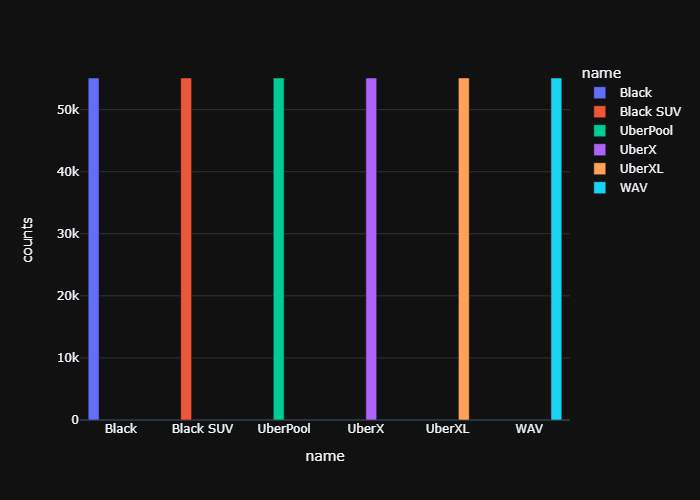

In [12]:
plot_bar('name')

In [13]:
plot_bar('date')

KeyboardInterrupt: 

In [16]:
pd[pd['name'] == 'Black']

TypeError: 'module' object is not subscriptable

                     source  counts
0                  Back Bay   27546
1               Beacon Hill   27377
2         Boston University   27552
3                    Fenway   27546
4        Financial District   27960
5          Haymarket Square   27533
6                 North End   27551
7             North Station   27250
8   Northeastern University   27550
9             South Station   27540
10         Theatre District   27671
11                 West End   27492


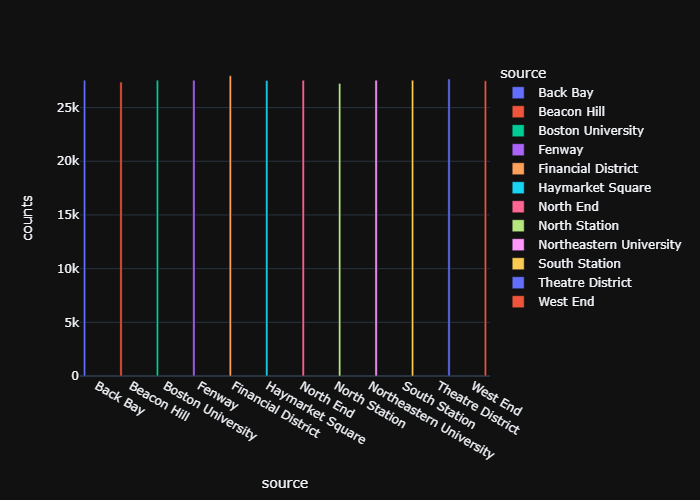

In [17]:
plot_bar('source')

                destination  counts
0                  Back Bay   27540
1               Beacon Hill   27376
2         Boston University   27557
3                    Fenway   27546
4        Financial District   27954
5          Haymarket Square   27558
6                 North End   27550
7             North Station   27251
8   Northeastern University   27546
9             South Station   27539
10         Theatre District   27653
11                 West End   27498


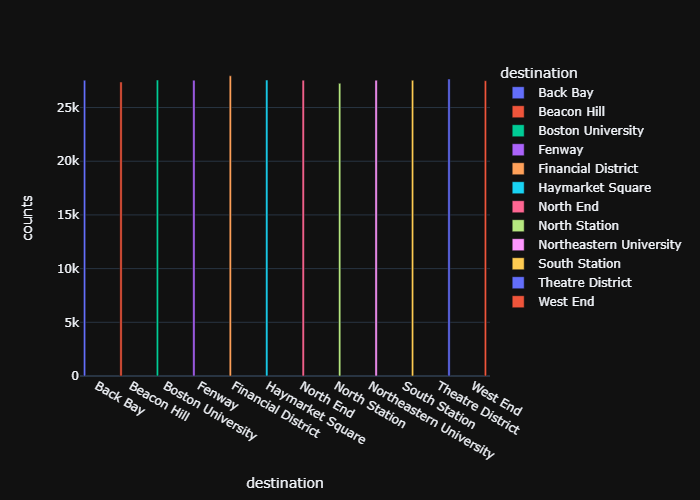

In [18]:
plot_bar('destination')


In [19]:
df.groupby(by=["destination","source"]).agg({'distance':'mean'})
